# Imports

In [2]:
%reload_ext autoreload
%autoreload 2

import os
import re
import math
import warnings
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import datetime
import nltk
import gensim
import pyLDAvis 
import imp 
import cv2
import tensorflow as tf
import plotly.express as px
from pyLDAvis import sklearn
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from datetime import datetime
from folium import IFrame
from PIL import Image, ImageOps, ImageFilter
from collections import defaultdict, Counter
#from xgboost import XGBoostRegressor
from keras import Model
import tensorflow.experimental.numpy as tnp
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor, make_column_selector
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, QuantileTransformer, RobustScaler, MinMaxScaler, normalize
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.impute import SimpleImputer
from scipy.sparse import coo_matrix, csr_matrix 

#
from P6_04_utils import *
#
pd.options.mode.chained_assignment = None  # default='warn'
#
%matplotlib inline
#
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 100)
#
warnings.filterwarnings('ignore')
# Setting theme
sns.set_theme(style="white")
#
#nltk.download('wordnet')
#
#%reload_ext pycodestyle_magic
#%flake8_on
#%flake8_off

C:\Users\romai\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Download

In [3]:
#
df_export = pd.read_pickle("data/df_export.pkt")


# Data

In [4]:
#
info(df_export)
df_export.head()

5 columns
1030 rows
Rate of missing values in df : 0.0 %



product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

   product_category  \
0  Home Furnishing    
1        Baby Care    
2        Baby Care    
3  Home Furnishing    
4  Home Furnishing    

                                                                       text_vectorized_pca_tfidf_numpy  \
0  [-0.39328820017381527, -0.06855124847576416, 0.0503748597066191, -0.038772747574730426, -0.22275...   
1  [-0.41923352015070287, 0.04122570261430237, 0.17563889778768826, -0.011490592059028939, -0.06167...   
2  [-0.35951278198376946, -0.02991632039884139, 0.1626705213808944, -0.018912874091898842, -0.07484...   
3  [-0.43498126689169314, -0.08268525412436892, 0.06054554845741921, -0.19480921265645493, -0.21754...   
4  [-0.39972811722106305, -0.08624820304514738, 0.08246140556013606, -0.18122184908726452, -0.18683...   

                                                                       image_vectorized_sift_pca_numpy  \
0  [-0.026925361802147062, -0.0013785859698354746, 0.006035832164244858, -0.07087158943120163, -0.0...   
1  [-0.040936442399145095, -0.013830566824275557, 0.020531825523164137, -0.05191826620051139, -0.07...   
2  [-0.032378393481229874, -0.03915286557420211, 0.002740555677049214, -0.03078997982605167, 0.0219...   
3  [-0.06533038512507498, 0.06918048791429234, 0.11174137245540776, 0.014379322168116904, -0.243636...   
4  [0.25581536128030263, 0.013239899789916298, -0.017388551423231802, -0.08970430635183092, 0.04085...   

                                                                            image_vectorized_vgg_numpy  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4581589102745056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.559...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.04391479...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5935195684432983, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.91973686...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.42556476...

# df_text_image

In [5]:
#
df_text_image = df_export[['product_name',
                           'product_category',
                           'text_vectorized_pca_tfidf_numpy',
                           'image_vectorized_sift_pca_numpy']]


#
info(df_text_image)
df_text_image.head()

4 columns
1030 rows
Rate of missing values in df : 0.0 %



product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

   product_category  \
0  Home Furnishing    
1        Baby Care    
2        Baby Care    
3  Home Furnishing    
4  Home Furnishing    

                                                                       text_vectorized_pca_tfidf_numpy  \
0  [-0.39328820017381527, -0.06855124847576416, 0.0503748597066191, -0.038772747574730426, -0.22275...   
1  [-0.41923352015070287, 0.04122570261430237, 0.17563889778768826, -0.011490592059028939, -0.06167...   
2  [-0.35951278198376946, -0.02991632039884139, 0.1626705213808944, -0.018912874091898842, -0.07484...   
3  [-0.43498126689169314, -0.08268525412436892, 0.06054554845741921, -0.19480921265645493, -0.21754...   
4  [-0.39972811722106305, -0.08624820304514738, 0.08246140556013606, -0.18122184908726452, -0.18683...   

                                                                       image_vectorized_sift_pca_numpy  
0  [-0.026925361802147062, -0.0013785859698354746, 0.006035832164244858, -0.07087158943120163, -0.0...  
1  [-0.040936442399145095, -0.013830566824275557, 0.020531825523164137, -0.05191826620051139, -0.07...  
2  [-0.032378393481229874, -0.03915286557420211, 0.002740555677049214, -0.03078997982605167, 0.0219...  
3  [-0.06533038512507498, 0.06918048791429234, 0.11174137245540776, 0.014379322168116904, -0.243636...  
4  [0.25581536128030263, 0.013239899789916298, -0.017388551423231802, -0.08970430635183092, 0.04085...

## Clustering

### 2D



PCA variance:


(PCA) explained variance for 100 components: 0.9471322437532022



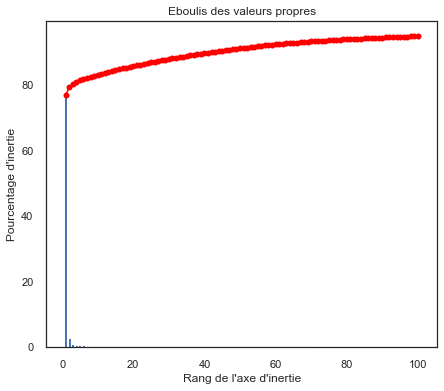



Clustering:



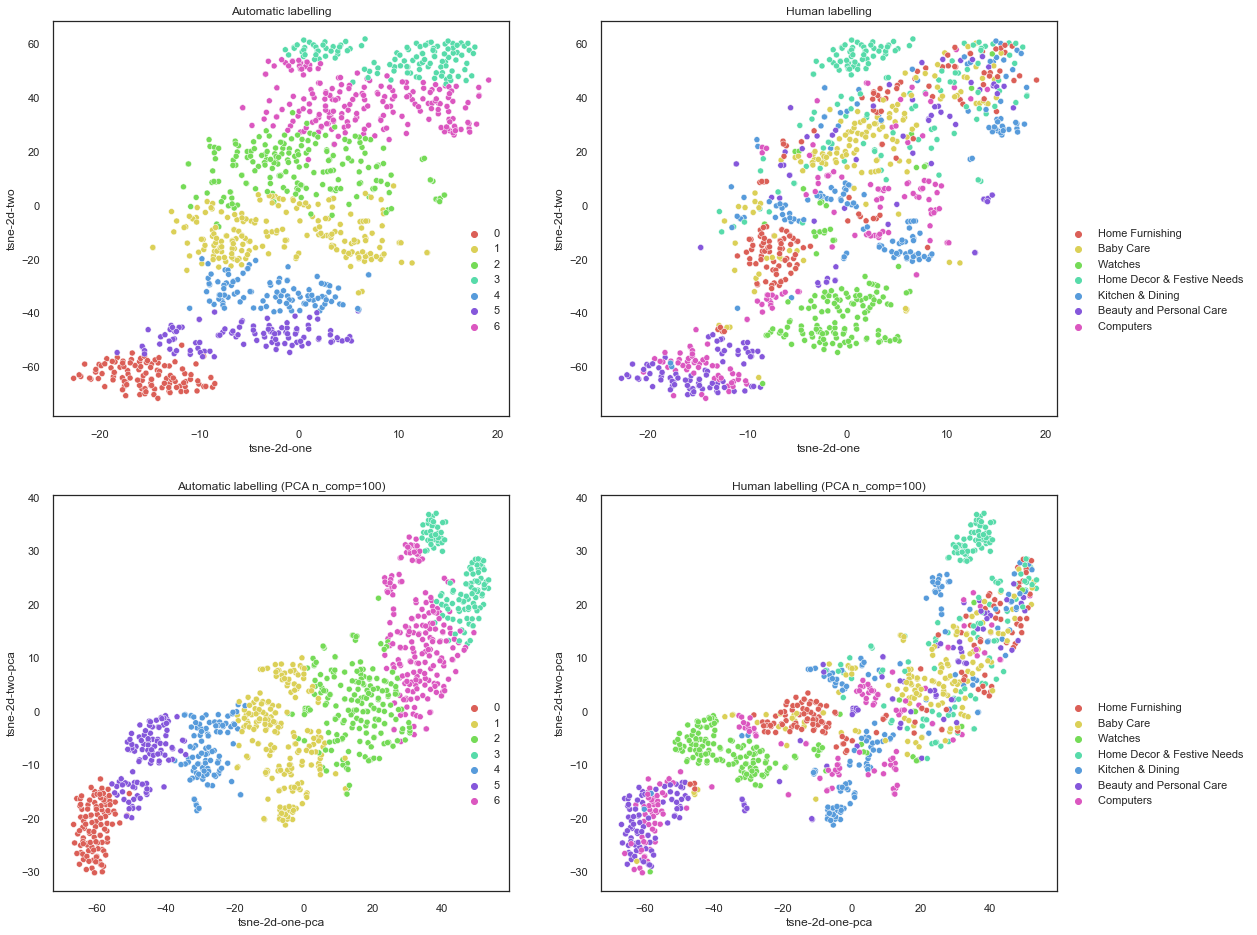


clustering stats:

ARI: 0.1362192171168204
Silhouette: 0.21518292997026534
Clustering fit time: 0.30271

clustering stats after pca:

ARI: 0.13714224345304238
Silhouette: 0.24408590203802644
Clustering fit time: 0.123669


In [6]:
#
clustering_params = {'n_clusters': 7}

#
res_text_image = text_image_clustering_function(df_text_image, 
                                               'text_vectorized_pca_tfidf_numpy',
                                               'image_vectorized_sift_pca_numpy',
                                               'product_category',
                                                KMeans,
                                                clustering_params, 
                                                100)

            

### 3D

In [7]:
#
clustering_3d_function(df_text_image, res_text_image[0][0], res_text_image[0][1], res_text_image[0][2], 'automatic', True)

### Confusion matrix

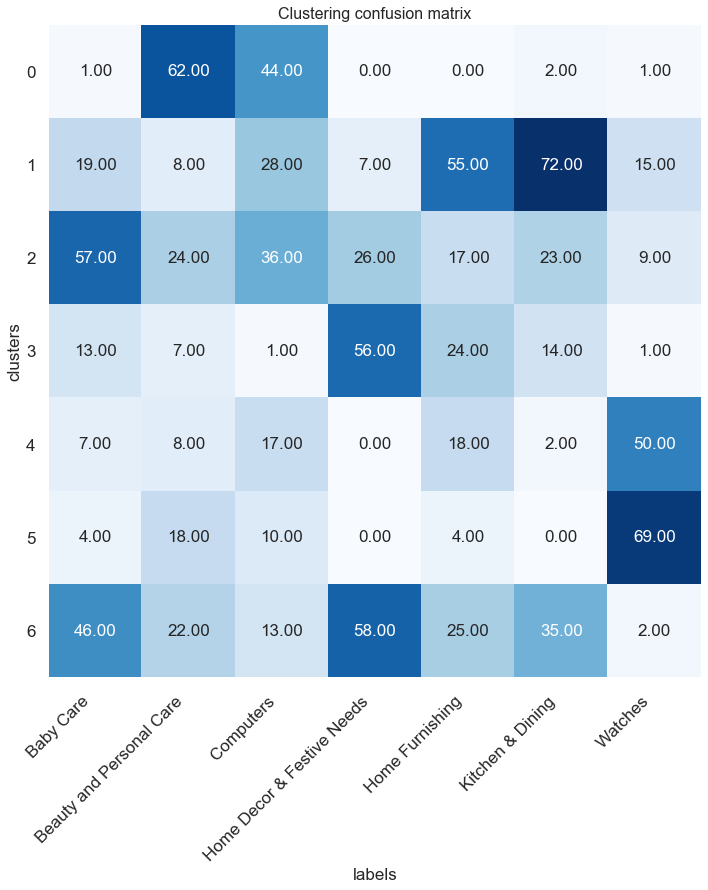

In [8]:
#
plot_confusion_matrix_function(res_text_image[0][0], res_text_image[0][1], "Clustering confusion matrix")

## Stats

In [9]:
# sum_up_table_function is defined in utils.py
df_table_3 = sum_up_table_function('Silhouette', 
                                'descending',
                                text_image=res_text_image[2],
                                text_image_pca=res_text_image[3]
                               )


df_table_3_ = df_table_3.style.highlight_min(color = 'red', axis = 0).highlight_max(color = 'green', axis = 0)
df_table_3_

### All use cases

In [10]:
df_table_1 = pd.read_pickle("data/df_table_1.pkt")
df_table_2 = pd.read_pickle("data/df_table_2.pkt")

dfs = [df_table_1, df_table_2, df_table_3]
df_general = pd.concat(dfs)

df_general = df_general.style.highlight_min(color = 'red', axis = 0).highlight_max(color = 'green', axis = 0)
df_general